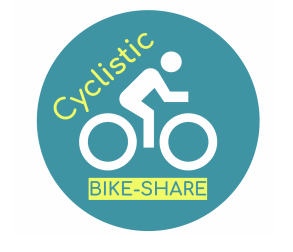

Here, we look at Cyclistic bike- sharing case study.[link text](https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1633478400&Signature=Y2-0tgSy3pGofpHU3bZtjBRkJTP0WH5d4ytHfOBaphU191Hx-kvbrtTUT2MFj6UDbx3LuC-9Th~-GDpu9ES5UGMnRwPnPQAi~oZI4qN1U6CFBP60lDQbQzjfX0y1fgqF8xrdSkXmvYiuP0~A4RI~dQVjtxLTlg1ynJFzDt29NDY_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

Source: google data analytics course 8; 202004-divvy-tripdata.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/drive')
#!pwd
%matplotlib inline

Mounted at /content/drive
/content


In [ ]:
divvy = pd.read_csv(
    '/content/drive/My Drive/202004-divvy-tripdata.csv',
    parse_dates=['ride_id'])
divvy.head()

In [ ]:
divvy.shape

(84776, 13)

In [ ]:
divvy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


In [ ]:
divvy['member_casual'].value_counts()

member    61148
casual    23628
Name: member_casual, dtype: int64

([<matplotlib.patches.Wedge at 0x7f59c04376d0>,
 [Text(-0.8447181574770333, -0.7045929565561994, 'member'),
  Text(0.8447181574770333, 0.7045929565561992, 'casual')],
 [Text(-0.46075535862383626, -0.38432343084883597, '72.1%'),
  Text(0.46075535862383626, 0.3843234308488359, '27.9%')])

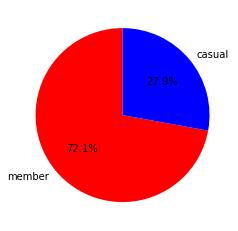

In [ ]:
labels= ['member', 'casual']

colors=['red', 'blue']

plt.pie(divvy['member_casual'].value_counts(),labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
#divvy['member_casual'].value_counts().plot(kind='pie',figsize=(6,6))

Visualizing the member types with percentages in a pie chart

Text(0, 0.5, 'Number of people')

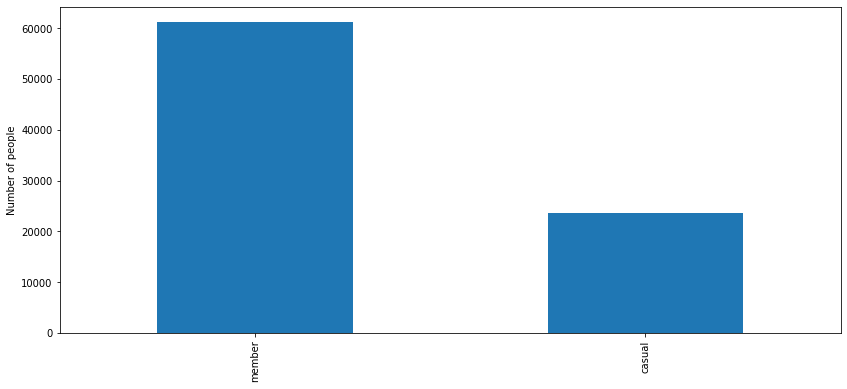

In [ ]:
ax = divvy['member_casual'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of people')

In [ ]:
corr = divvy.corr()

corr

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
start_station_id,1.000000,0.369572,0.285483,-0.334168,0.242883,-0.232235
end_station_id,0.369572,1.000000,0.246130,-0.234778,0.289015,-0.336922
start_lat,0.285483,0.246130,1.000000,-0.547560,0.875660,-0.489053
start_lng,-0.334168,-0.234778,-0.547560,1.000000,-0.486646,0.726300
end_lat,0.242883,0.289015,0.875660,-0.486646,1.000000,-0.546280
end_lng,-0.232235,-0.336922,-0.489053,0.726300,-0.546280,1.000000


Not much relationship seen here

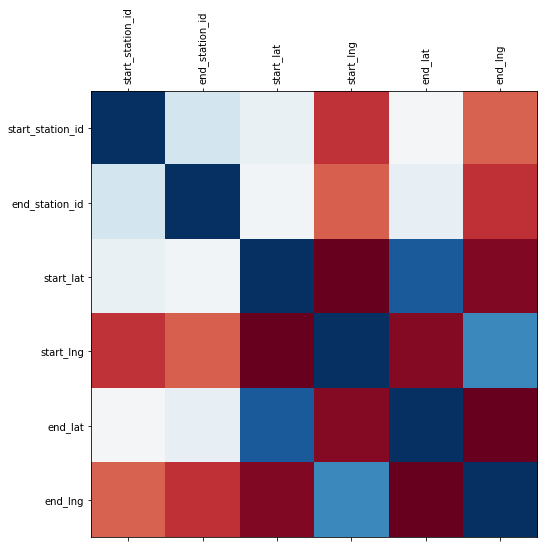

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

Let us find the ride_length which would be the time duration of the entire ride. We take end time - start time.


In [ ]:
divvy['ended_at_time']= pd.to_datetime(divvy['ended_at'])
divvy['started_at_time']= pd.to_datetime(divvy['started_at'])
divvy['ride_length'] = divvy['ended_at_time'] - divvy['started_at_time']

divvy['ride_length'].head()

0   0 days 00:26:49
1   0 days 00:08:09
2   0 days 00:14:23
3   0 days 00:12:12
4   0 days 00:52:55
Name: ride_length, dtype: timedelta64[ns]

In [ ]:
divvy['ride_length'].describe()

count                        84776
mean     0 days 00:35:51.000778522
std      0 days 09:27:32.109541421
min              -1 days +23:57:04
25%                0 days 00:08:45
50%                0 days 00:16:22
75%                0 days 00:28:03
max               40 days 18:40:02
Name: ride_length, dtype: object

Some stats on the duration of the rides

The min here seems wrong. Perhaps a misentry here

Check out that 40 days bike ride!


In [ ]:
divvy['start_station_id'].value_counts()


176    850
110    730
56     720
211    686
94     626
      ... 
391      1
4        1
649      1
398      1
639      1
Name: start_station_id, Length: 602, dtype: int64

In [ ]:
divvy['end_station_id'].value_counts()

176.0    893
110.0    785
211.0    695
56.0     678
300.0    675
        ... 
565.0      1
556.0      1
566.0      1
563.0      1
568.0      1
Name: end_station_id, Length: 600, dtype: int64

In [ ]:
divvy['start_station_name'].value_counts()

Clark St & Elm St            850
Dearborn St & Erie St        730
Desplaines St & Kinzie St    720
St. Clair St & Erie St       686
Clark St & Armitage Ave      626
                            ... 
Vernon Ave & 79th St           1
Rainbow Beach                  1
Halsted St & 69th St           1
Michigan Ave & 71st St         1
Burnham Harbor                 1
Name: start_station_name, Length: 602, dtype: int64

In [ ]:
divvy['end_station_name'].value_counts()

Station 176 is most visited. This likely would be the station at Clark St & Elm St.

In [ ]:
divvy['ride_length'].mean()

In [ ]:
divvy['ride_length'].max()

Quick check here

In [ ]:
import plotly.express as px
fig = px.scatter_geo(divvy,lat='start_lat',lon='start_lng')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()


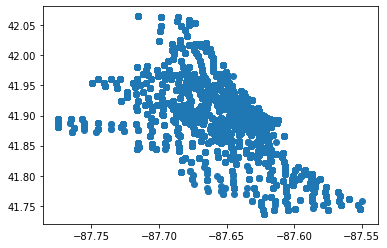

In [ ]:
plt.scatter(x=divvy['start_lng'], y=divvy['start_lat'])
plt.show()

Finding the general location & close up view of the bike service

In [ ]:

from geopy.geocoders import Nominatim
Latitude = "41.8964"
Longitude = "-87.661"

location = geolocator.reverse(Latitude+","+Longitude)

# Display
print(location)



Eckhart Park, West Chicago Avenue, West Town, Chicago, Cook County, Illinois, 60642, United States
